### Imports

In [1]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")

from perceptron import Perceptron

### Data preparation

In [3]:
df = pd.read_csv("../../db/wine/winequality-red.csv", delimiter=";")

# normalization
df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

train=df.sample(frac=0.7, random_state=777)
test=df.drop(train.index)

X = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'pH']].values
Y = train['quality']

### Learn

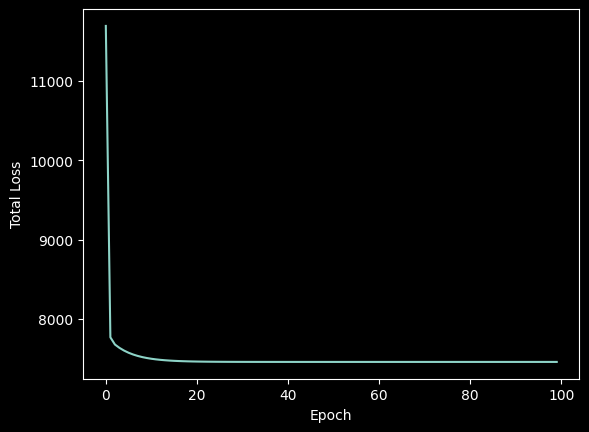

In [4]:
p = Perceptron(in_size=X.shape[1], epochs=100)
costs = p.learn(X, Y)

plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.plot(costs[:, 0], costs[:, 1])

### Test

In [5]:
test_X = test.drop('quality', axis=1).values
test_Y = test['quality'].values

predicted = p.predict(test_X)

diff = (predicted - test_Y) ** 2
diff.sum() * 1 / len(test_Y)

0.5502959078879225